In [5]:
pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.1.3-cp310-cp310-win_amd64.whl (7.5 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA

from sklearn.linear_model import LogisticRegression   
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:

if __name__ == "__main__":
    dt_heart = pd.read_csv('./data/heart.csv')

    print(dt_heart.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [9]:
dt_features = dt_heart.drop(['target'],axis=1)
dt_target = dt_heart['target']

In [12]:
dt_features = StandardScaler().fit_transform(df_features)

X_train, X_test, y_train, y_test = train_test_split(dt_features,dt_target,test_size=0.3,random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(717, 13)
(308, 13)
(717,)
(308,)


In [34]:
pca = PCA(n_components=5)
pca.fit(X_train)

PCA(n_components=5)

In [35]:
ipca = IncrementalPCA(n_components=5,batch_size=10)
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=5)

In [40]:
kpca = KernelPCA(n_components=5, kernel='poly')

kpca.fit(X_train)

dt_train = kpca.transform(X_train)
dt_test=kpca.transform(X_test)

logistic = LogisticRegression(solver='lbfgs')

logistic.fit(dt_train,y_train)

print("SCORE", logistic.score(dt_test,y_test))

SCORE 0.8214285714285714


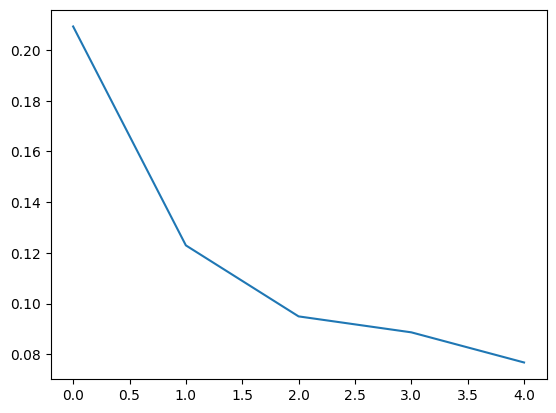

In [36]:
plt.plot(range(len(pca.explained_variance_)),pca.explained_variance_ratio_)

In [37]:
logistic = LogisticRegression(solver= 'lbfgs')

dt_train = pca.transform(X_train)

dt_test =pca.transform(X_test)

logistic.fit(dt_train,y_train)

print("SCORE PCA", logistic.score(dt_test,y_test))

dt_train = ipca.transform(X_train)

dt_test = ipca.transform(X_test)

logistic.fit(dt_train,y_train)

print("Score IPCA",logistic.score(dt_test,y_test))

SCORE PCA 0.827922077922078
Score IPCA 0.8051948051948052
